In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
post_sample = np.loadtxt('post.txt')
beta = post_sample[:,0]
gamma = post_sample[:,1]

In [10]:
np.mean(beta)

1.203651042148087

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


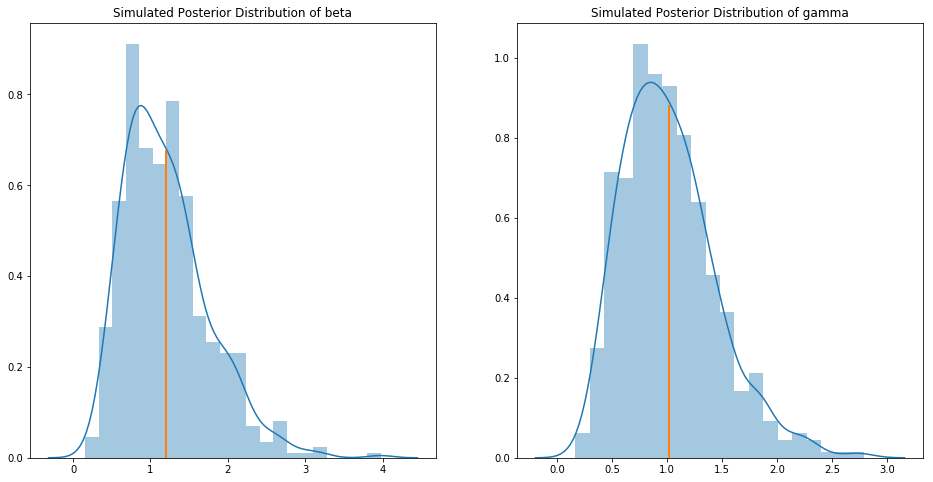

In [38]:
plt.figure(figsize=(16,8))

plt.subplot(1,2, 1)
sns.distplot(a = beta, )
plt.plot([np.mean(beta), np.mean(beta)], [0, 0.675], linewidth=2)
plt.title('Simulated Posterior Distribution of beta')

plt.subplot(1,2, 2)
sns.distplot(gamma)
plt.plot([np.mean(gamma), np.mean(gamma)], [0, 0.88], linewidth=2)
plt.title('Simulated Posterior Distribution of gamma')
pass

plt.savefig('dist.png')